In [2]:
# ------------------------------------------------------------------------------------------------------------------- #
# Import Required Libraries
# ------------------------------------------------------------------------------------------------------------------- #
import os
import re
import glob
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FixedLocator
import math
# ------------------------------------------------------------------------------------------------------------------- #


# ------------------------------------------------------------------------------------------------------------------- #
DIR_HOME1 = 'D:\\Work\\OneDrive\\Walop_work\\Exptime_cal\\'
# ------------------------------------------------------------------------------------------------------------------- #

file_name1 = 'metadata2020_Gina.csv'
data_df = pd.read_csv(DIR_HOME1 + file_name1)

data_df

,source_id,p,p_er,theta,theta_er,q,q_er,u,u_er,Rmag,...,bgr2,bgr3,inner_aperture0,inner_aperture1,inner_aperture2,inner_aperture3,apert0,apert1,apert2,apert3
0,IT_1627-0145157,0.01018,0.00138,-0.4165,0.0685,0.00685,0.00135,-0.00753,0.0014,14.71,...,1592.7,1653.9,17.16,17.16,15.47,15.47,3.51,3.51,3.16,3.16
1,IT_1627-0144333,0.01669,0.00192,-0.2783,0.058,0.01417,0.00188,-0.00882,0.00201,14.81,...,1151.2,1167.8,17.18,17.18,16.97,16.97,3.97,3.97,3.92,3.92
2,IT_1611-0128017,0.02127,0.00139,-0.6525,0.0329,0.00559,0.00138,-0.02052,0.0014,13.64,...,1206.6,1138.8,16.94,16.94,16.28,16.28,3.78,3.78,3.63,3.63
3,IT_1624-0141790,0.01535,0.00196,-0.3557,0.0645,0.01163,0.00191,-0.01002,0.00202,15.50,...,2823.5,2993.3,12.93,12.93,11.64,11.64,3.81,3.81,3.43,3.43
4,IT_1615-0129009,0.02992,0.0013,-0.4403,0.0217,0.01905,0.00125,-0.02307,0.00133,13.58,...,1188.0,1130.5,15.58,15.58,14.80,14.80,3.87,3.87,3.67,3.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,IT_1617-0135230,0.01287,0.00119,-0.5387,0.0463,0.00609,0.00118,-0.01133,0.00119,13.55,...,1181.6,1129.3,14.98,14.98,14.42,14.42,3.92,3.92,3.77,3.77
389,IT_1621-0143477,0.02009,0.00228,-0.5274,0.0573,0.00991,0.00228,-0.01747,0.00228,15.11,...,1204.3,1254.9,19.70,19.70,19.40,19.40,3.98,3.98,3.92,3.92
390,IT_1629-0138428,0.01543,0.00251,-0.1606,0.0827,0.01464,0.0025,-0.00487,0.00255,15.37,...,1607.0,2339.5,19.02,19.02,17.35,17.35,3.72,3.72,3.39,3.39
391,IT_1613-0126536,0.02008,0.00178,-0.533,0.0445,0.00971,0.00178,-0.01758,0.00178,14.00,...,1695.3,1403.0,16.24,16.24,15.74,15.74,3.79,3.79,3.68,3.68


In [3]:
# R band zero magnitude star flux and photons #
Mflux=4246
lc=6152
dl=0.221
Ph=Mflux*1.51*10**7*(dl)/(10000*dl*lc) #photons/s/cm^2/angstrom#
Ph

1042.1749024707412

In [4]:
#Telescope and instrument throughput#
Pdia=99
Sdia=42.5       
Obs=((Pdia/2)**2-(Sdia/2)**2)/(Pdia/2)**2
#Transmission parameters#
mir=0.85
Iwin=0.99
len1=0.99
CalibHWP=1
fil=1
Wedge=0.99
HWP=0.98
wol=0.92
DispCor=0.99
Mirror=0.99
PBS=0.9
len2=0.99
Dwin=0.99
CCD=0.9
etainst=Obs*(mir**2)*(len1**6)*(CalibHWP)*(fil**1)*Wedge*(HWP**1)*(wol**1)*(DispCor**2)*(Mirror**1)*(PBS**1)*(len2**6)*(Dwin**1)*(CCD**1)
CCDrdnoise=3    #photons#
CCDdknoise=0.05  #photons/second#
pixscale=0.51 
etainst#arcseconds/pixel#

0.36280192271099143

In [5]:
#Telescope efficiency#
airmass=data_df['airmass']
Ele=(math.pi/2-np.arccos(1/airmass))*180/math.pi
OPL=1/np.sqrt(1-0.96*np.sin((90-Ele)*math.pi/180)**2)
Atmext=0.9 #zenith#
area=math.pi*(Pdia/2)**2
FilBW=1363
Eff=etainst*Atmext*np.cos((90-Ele)*np.pi/180)

In [6]:
#Auto-guider information#
Skymag=20  #mag/arc^2#
Centwdw=10  #arcsecs#
SNR=10
Agmag=15
Ageta=Eff
Agph=Ph*Eff*10**(-0.4*Agmag)*FilBW*area
Skyphd=Ph*10**(-0.4*Skymag)              #photons/s/cm^2/Angstrom/arcsec^2#
Agskyph=Skyphd*(Centwdw)**2*area*FilBW*etainst   
t=5/60                                    #Minutes to reach the SNR#
SigX=np.sqrt(((Agph+Agskyph)*t*60)/(Agph*t*60)**2)

In [8]:
#Sky photons calculations#
Seeing=1 #arcseconds#
Phap1=data_df['inner_aperture0']
Phap2=data_df['inner_aperture2']
Effseeing=np.sqrt(Seeing**2+SigX**2)
Aperarea1=math.pi*(Effseeing*Phap1/2)**2     #arcseconds#
Aperarea2=math.pi*(Effseeing*Phap2/2)**2
Aperareap1=Aperarea1/pixscale               #pixels Spots 1 and 2
Aperareap2=Aperarea2/pixscale              #pixels  Spots 3 and 4
Skyph1=Skyphd*Aperarea1                    
Skyph2=Skyphd*Aperarea2 
Skymag1=-2.5*np.log10(Skyph1/Ph)
Skymag2=-2.5*np.log10(Skyph2/Ph)
Ext=-2.5*np.log10(Atmext)         #mag/airmass#
Skymagext1=Skymag1-2.5*np.log10((1-0.6)+0.6*OPL)+Ext*(OPL-1)
Skymagext2=Skymag2-2.5*np.log10((1-0.6)+0.6*OPL)+Ext*(OPL-1)
Skyphext1=Ph*10**(-0.4*Skymagext1)    #photons/s/cm^2/Angstrom#
Skyphext2=Ph*10**(-0.4*Skymagext2)   #photons/s/cm^2/Angstrom#

C:\Users\Ramya\miniconda3\envs\py310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
#Source info and photons#
Srcmag=data_df['Rmag'].astype(float)
pinp=data_df['p'].astype(float)
sigmapinp=data_df['p_er'].astype(float)
data_df['theta'] = data_df['theta'].astype(float)
EVPA=data_df['theta']
Nsrct=Eff*Ph*10**(-0.4*Srcmag)*FilBW*area
Nsrc0=((1-pinp)*Nsrct/4)+(pinp*Nsrct/2*np.cos(EVPA)**2)
Nsrc1=((1-pinp)*Nsrct/4)+(pinp*Nsrct/2*np.sin(EVPA)**2)
Nsrc2=((1-pinp)*Nsrct/4)+(pinp*Nsrct/2*np.cos((EVPA+math.pi/4))**2)
Nsrc3=((1-pinp)*Nsrct/4)+(pinp*Nsrct/2*np.sin((EVPA+math.pi/4))**2)
Nsky1=Skyphext1*area*FilBW*etainst/4
Nsky2=Skyphext2*area*FilBW*etainst/4

In [12]:
#Photometry and Polarimetry#
Exptime=data_df['exposure']/60
NoofExp=1
TperExp=Exptime/NoofExp
N0=Nsrc0*TperExp*60*NoofExp
N1=Nsrc1*TperExp*60*NoofExp
N2=Nsrc2*TperExp*60*NoofExp
N3=Nsrc3*TperExp*60*NoofExp
TNsky1=Nsky1*TperExp*60*NoofExp
TNsky2=Nsky2*TperExp*60*NoofExp
Dark=CCDdknoise*TperExp*60*NoofExp
Rdnoise=CCDrdnoise*NoofExp
TRdnoise1=Rdnoise*Aperareap1
TRdnoise2=Rdnoise*Aperareap2
sigmaN0=np.sqrt(N0+TNsky1+(Dark*Aperareap1)+(Rdnoise*Aperareap1))
sigmaN1=np.sqrt(N1+TNsky1+(Dark*Aperareap1)+(Rdnoise*Aperareap1))
sigmaN2=np.sqrt(N2+TNsky2+(Dark*Aperareap2)+(Rdnoise*Aperareap2))
sigmaN3=np.sqrt(N3+TNsky2+(Dark*Aperareap2)+(Rdnoise*Aperareap2))
q=(N0-N1)/(N0+N1)
u=(N2-N3)/(N2+N3)
pout=np.sqrt(q**2+u**2)
EVPAn=0.5*(np.arctan(u/q)*180/math.pi)
sigmaq=np.sqrt((4*(N1**2*sigmaN0**2+N0**2*sigmaN1**2)/(N0+N1)**4))
sigmau=np.sqrt((4*(N3**2*sigmaN2**2+N2**2*sigmaN3**2)/(N2+N3)**4))
sigmapout=np.sqrt((q**2*sigmaq**2+u**2*sigmau**2)/(q**2+u**2))
sigmaEVPA=0.5*(sigmapout/pout)*180/math.pi
PSNR=pout/sigmapout

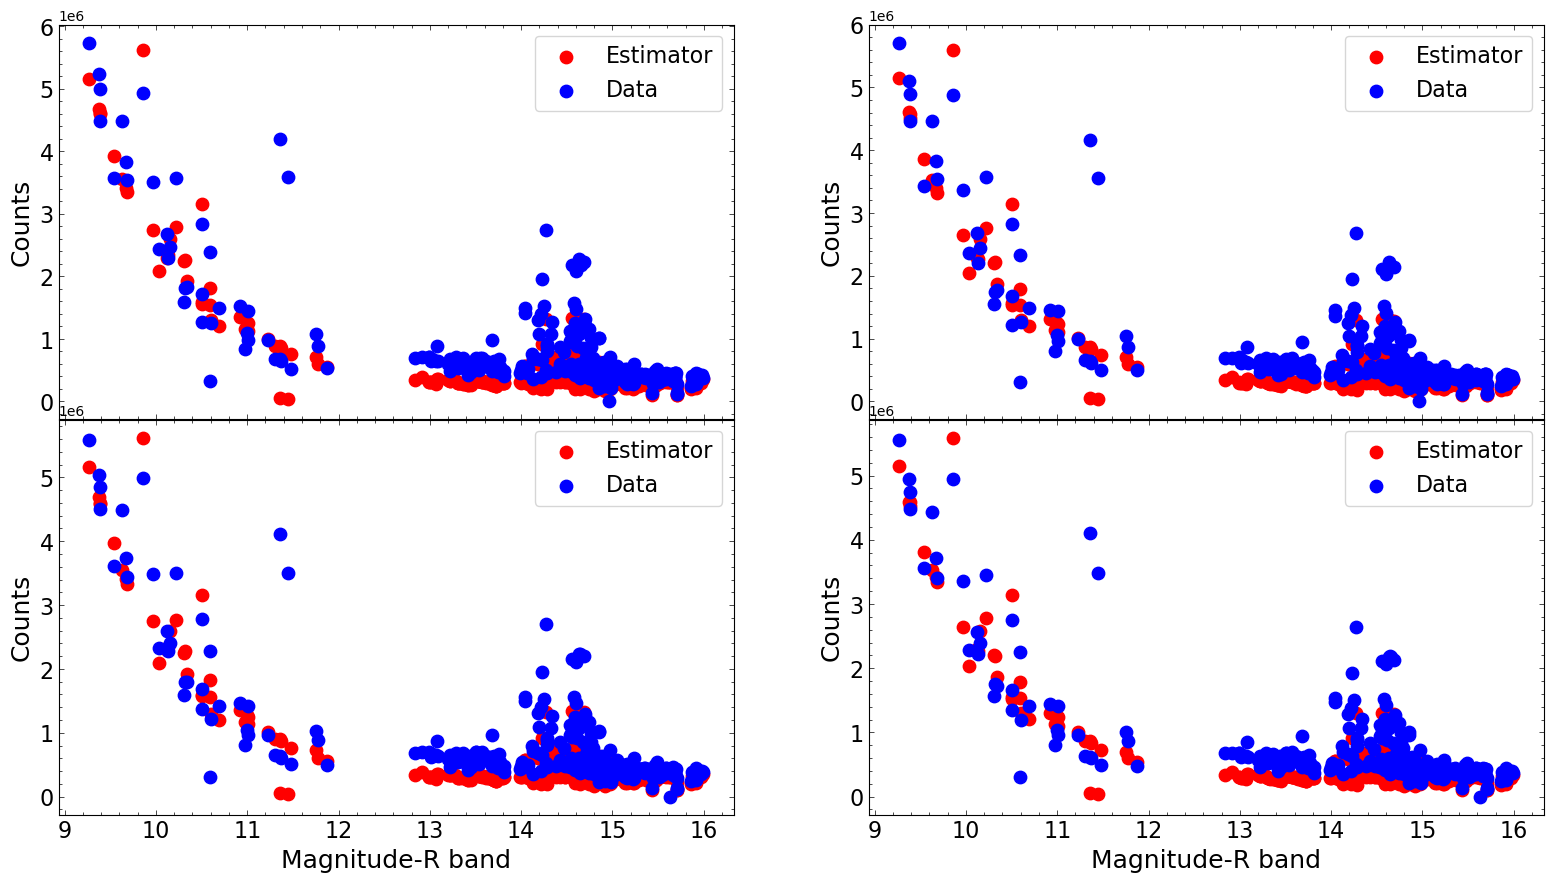

In [20]:
fig = plt.figure(figsize=(18, 10))

ax1 = fig.add_subplot(221)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.scatter(Srcmag, N0, marker='o', c='r', s=20*2**2, label='Estimator')
ax1.scatter(Srcmag, (data_df['N0']), marker='o', c='b', s=20*2**2, label='Data')
ax1.set_xlabel('Magnitude-R band',fontsize=18)
ax1.set_ylabel('Counts', fontsize=18)
ax1.legend(loc='upper right',fontsize=16)

ax2 = fig.add_subplot(222)
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.minorticks_on()
ax2.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax2.scatter(Srcmag, N1, marker='o', c='r', s=20*2**2, label='Estimator')
ax2.scatter(Srcmag, (data_df['N1']), marker='o', c='b', s=20*2**2,label='Data')
ax2.set_xlabel('Magnitude-R band',fontsize=18)
ax2.set_ylabel('Counts', fontsize=18)
ax2.legend(loc='upper right',fontsize=16)

ax3 = fig.add_subplot(223)
ax3.yaxis.set_ticks_position('both')
ax3.xaxis.set_ticks_position('both')
ax3.minorticks_on()
ax3.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax3.scatter(Srcmag, N2, marker='o', c='r', s=20*2**2, label='Estimator')
ax3.scatter(Srcmag, (data_df['N2']), marker='o', c='b', s=20*2**2,  label='Data')
ax3.set_xlabel('Magnitude-R band',fontsize=18)
ax3.set_ylabel('Counts', fontsize=18)
ax3.legend(loc='upper right',fontsize=16)

ax4 = fig.add_subplot(224)
ax4.yaxis.set_ticks_position('both')
ax4.xaxis.set_ticks_position('both')
ax4.minorticks_on()
ax4.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax4.scatter(Srcmag, N3, marker='o', c='r', s=20*2**2, label='Estimator')
ax4.scatter(Srcmag, (data_df['N3']), marker='o', c='b', s=20*2**2,label='Data')
ax4.set_xlabel('Magnitude-R band',fontsize=18)
ax4.set_ylabel('Counts', fontsize=18)
ax4.legend(loc='upper right',fontsize=16)

fig.subplots_adjust(hspace=0.001, wspace=0.2, top=0.9, right=0.95)
#fig.savefig('D:\\OneDrive\\Walop_work\\Exptime_cal\\Data_Estimator_Comp_counts_gaincorrected.pdf', dpi=2000, format='pdf', bbox_inches='tight')
#fig.savefig('D:\\OneDrive\\Walop_work\\Exptime_cal\\Data_Estimator_Comp_counts_gaincorrected.png', dpi=2000, format='png', bbox_inches='tight')
plt.show()
plt.close(fig)

<ErrorbarContainer object of 3 artists>

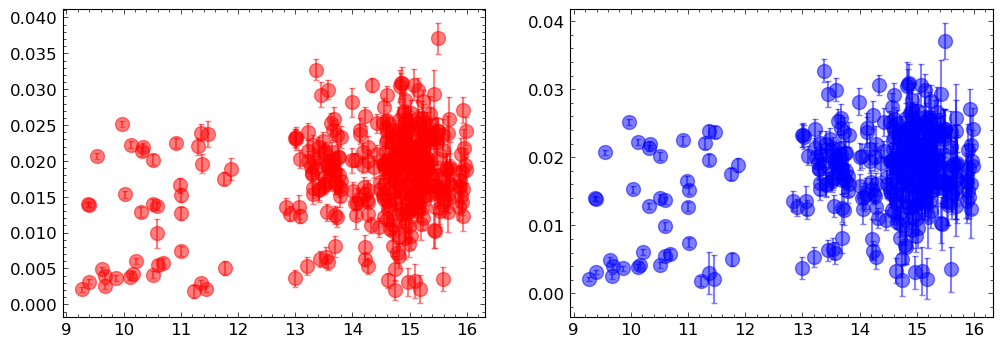

In [21]:
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(121)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
#ax1.set_ylim(2.5, 6.5)
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=12)
ax1.errorbar(Srcmag,pinp,yerr=sigmapinp, markersize=10, alpha=0.5,marker='o', c='r',
             linestyle='', capsize=2, capthick=1, label='Data')
ax2 = fig.add_subplot(122)
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.minorticks_on()
#ax1.set_ylim(2.5, 6.5)
ax2.tick_params(which='both', direction='in', width=0.5, labelsize=12)
ax2.errorbar(Srcmag,pout,yerr=sigmapout, markersize=10, alpha=0.5, marker='o', c='b',
             linestyle='', capsize=2, capthick=1, label='Estimator')

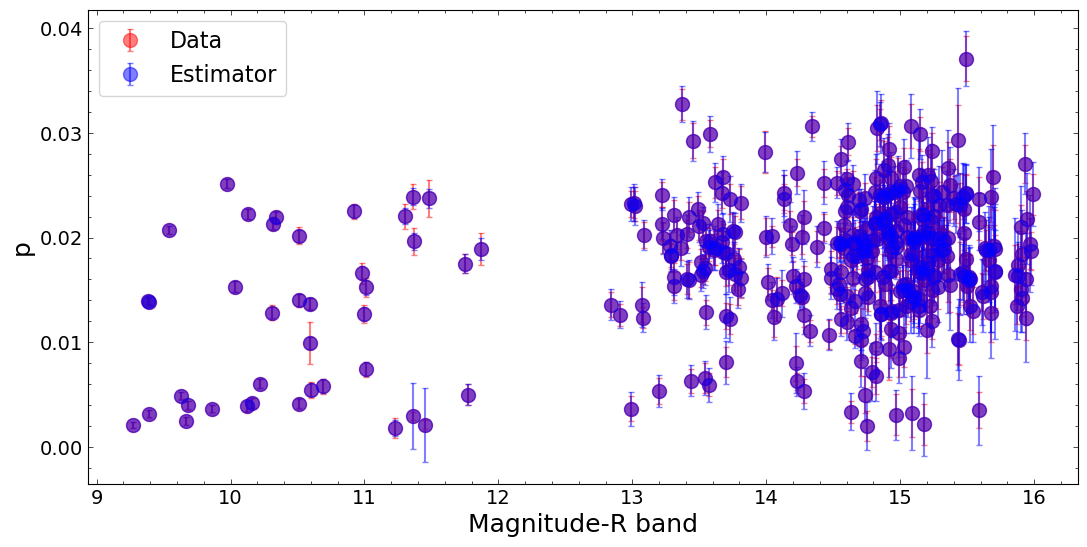

In [24]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(111)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
#ax1.set_ylim(2.5, 6.5)
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=14)
ax1.errorbar(Srcmag,pinp,yerr=sigmapinp, markersize=10, alpha=0.5,marker='o', c='r',
             linestyle='', capsize=2, capthick=1, label='Data')
ax1.errorbar(Srcmag,pout,yerr=sigmapout, markersize=10, alpha=0.5, marker='o', c='b',
             linestyle='', capsize=2, capthick=1, label='Estimator')
ax1.set_xlabel('Magnitude-R band',fontsize=18)
ax1.set_ylabel('p', fontsize=18)
ax1.legend(loc='upper left',fontsize=16)
fig.subplots_adjust(hspace=0.001, wspace=0.01, top=0.9, right=0.95)
plt.show()
plt.close(fig)